<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/2d_compare_ALL_top_bottom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

for plane in plane_list:
  plane['pd'] = pd.read_csv(plane['url'], names=columns_name)
  
  # Espelhar matriz - eixo y
  plane['pd'] = plane['pd'][plane['pd'].columns[::-1]]
  
  # -dB
  plane['np'] = -plane['pd'].values

In [0]:
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

def load_csv(url_list, title, columns_name):
  for url in url_list:
    plane = { 
      'name': title,
      'url': url,
      'pd': pd.read_csv(url, names=columns_name),
      'np': -pd_elc_plane_bottom_24_MHz.values  
    }
    return plane_list.append(plane) 

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz[pd_elc_plane_bottom_24_MHz.columns[::-1]]
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz[pd_elc_plane_bottom_500_KHz.columns[::-1]]
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz[pd_mag_plane_bottom_24_MHz.columns[::-1]]

pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz

plane_list = []

plane = { 
  'name': 'Lucas: elc_plane_bottom_24_MHz',
  'url': url_elc_plane_bottom_24_MHz,
  'pd': None,
  'np': None  
}

plane_list.append(plane) 
plane_list.append(plane)
plane_list.append(plane) 
plane_list.append(plane)

plane_list.append(plane) 
plane_list.append(plane)
plane_list.append(plane) 
plane_list.append(plane)


---
##  Plot 2d: Global Config

In [0]:
cube_range = (0, 13)

plot_layout = (2, 2)

gap_layout = (5.5,1,1,9) # (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

global_scale = (10, -60)

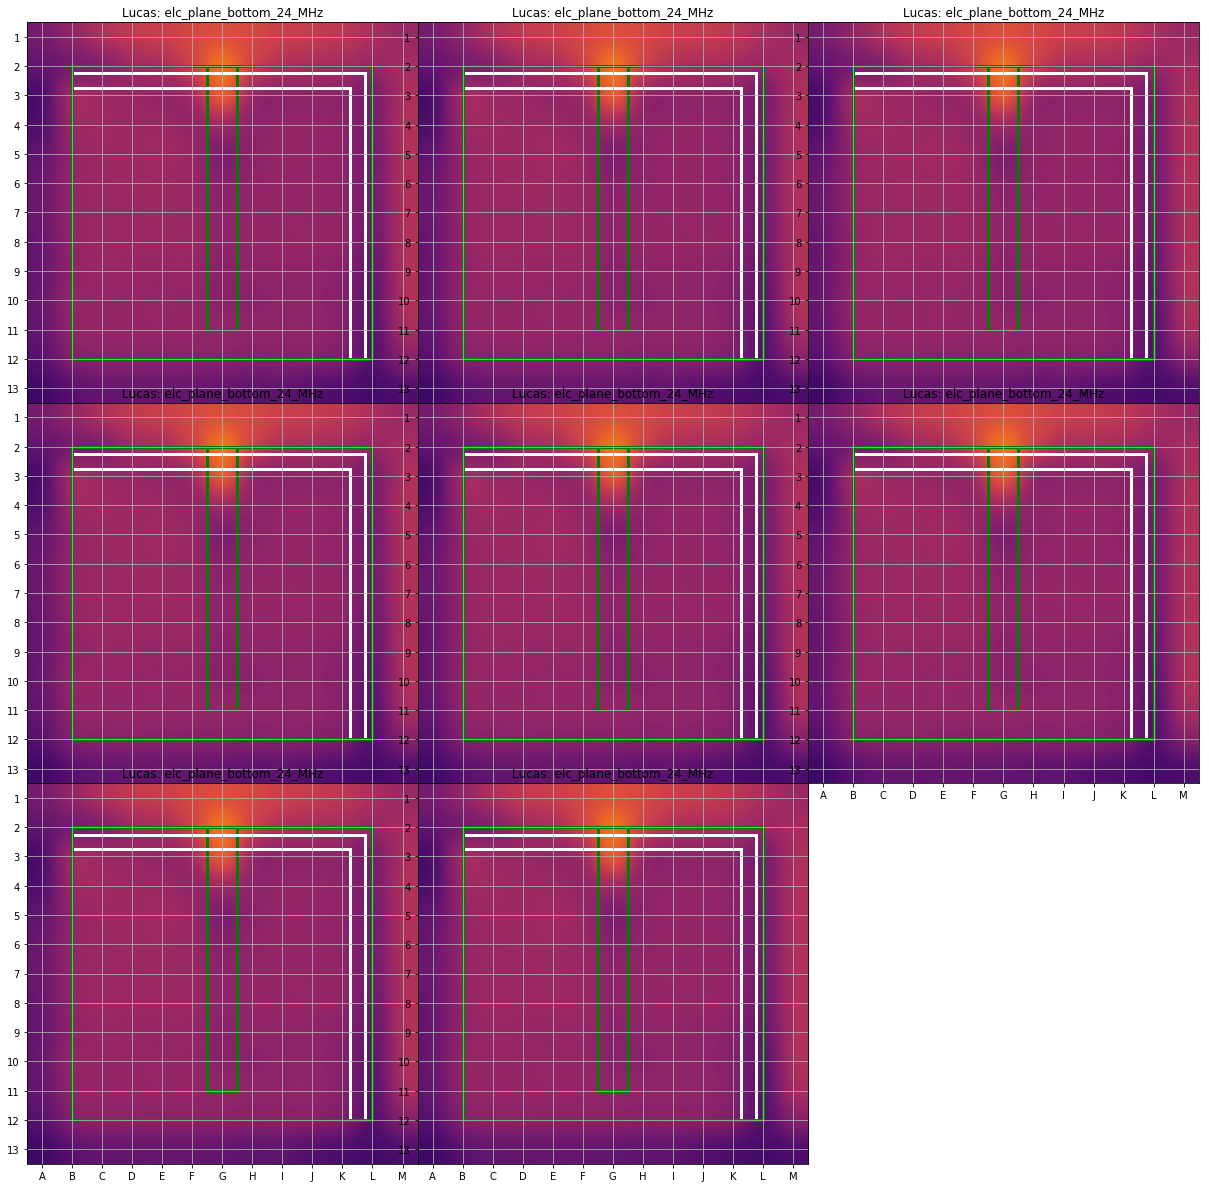

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

#=============================================================================== 
subplot_ncols = 3
subplot_nrows = int(len(plane_list)/subplot_ncols)+int(len(plane_list)%subplot_ncols)


fig = plt.figure(figsize = (subplot_ncols*7, subplot_nrows*7))

ax = [fig.add_subplot(subplot_nrows, 
                      subplot_ncols, 
                      index+1) 
      for index in range(len(plane_list))]

for index, plane in enumerate(plane_list):
  
  ax[index].imshow(plane['np'],
                   interpolation ='gaussian', 
                   cmap ='inferno',
                   vmax = global_scale[0],
                   vmin = global_scale[1])
  
  ax[index].set_title(plane['name'])
  
  ax[index].set_xlim([cube_range[0] - .5, cube_range[1] - .5])
  ax[index].set_ylim([cube_range[0] - .5, cube_range[1] - .5])

  ax[index].set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
  ax[index].set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

  ax[index].xaxis.set_major_formatter(xticks_formatter)
  ax[index].yaxis.set_major_formatter(yticks_formatter)

  ax[index].grid(True)

  ax[index].set_ylim(ax[index].get_ylim()[::-1])
  
  ax[index].set_aspect('auto')
  
  # ------------------------------------------------------------------------------
  # EUT Layout
  gap = patches.Rectangle(np.array(gap_layout[:2]),
                          gap_layout[2],
                          gap_layout[3],
                          linewidth=3,
                          edgecolor='g',
                          facecolor='none')
  ax[index].add_patch(gap)

  L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
  L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
  ax[index].add_patch(L)

  edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
  ax[index].add_patch(edge)
  
fig.subplots_adjust(wspace=0, hspace=0)

# Abordagem  para multiplos times

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import IndexFormatter
import matplotlib.patches as patches

# GLOBAL CONFIG
cube_range = (0, 13)
plot_layout = (2, 2)
gap_layout = (5.5,1,1,9) # (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).
global_scale = (10, -60)

def plane(url_of_csv_file: str, 
          signal_frequency: str, 
          probe_type: str, 
          pcb_side: str) -> dict:
    return {
        'url_of_csv_file': url_of_csv_file,
        'signal_frequency': signal_frequency,
        'probe_type': probe_type,
        'pcb_side': pcb_side
    }


def team(team_members: list, 
         board_number: int, 
         planes: list) -> dict:
    return {
        'team_members': team_members,
        'board_number': board_number,
        'planes': planes
    }


def csv_to_numpy(url: str, names: list) -> np.ndarray:
    csv_file = pd.read_csv(url, names=names)
#     values = csv_file[csv_file.columns[::-1]].values
    values = csv_file[csv_file.columns].values
    if np.min(values) < 0:
        return values
    else:
        return -abs(values)


def get_patches():
    if placa == 0:
        chanfro = (0,0,0,0)
    elif placa == 1:
        chanfro = (5.5,2,1,9)
    elif placa == 2:
        chanfro = (5.5,1,1,9)
    elif placa == 3:
        chanfro = (1,5.5,9,1)
        
    

def plot(teams):
    
    subplot_ncols = len(teams[0]['planes'])
    subplot_nrows = len(teams)
    col_pixel_size = 20/subplot_ncols
    row_pixel_size = col_pixel_size

    fig = plt.figure(figsize = ((subplot_ncols)*col_pixel_size, (subplot_nrows)*row_pixel_size))
    
    columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    rows_name = np.arange(1,14,1).tolist()
    xticks_formatter = IndexFormatter(columns_name)
    yticks_formatter = IndexFormatter(rows_name)
    
    ax = None

    for row, team in enumerate(teams):
        for col, plane in enumerate(team['planes']):
            index = 1 + col + subplot_ncols * row
            
            data_from_csv = csv_to_numpy(plane['url_of_csv_file'], columns_name)
            
            ax = fig.add_subplot(subplot_nrows, subplot_ncols, index, sharex=ax, sharey=ax)
            
            if team['team_members'][0] is 'Iam':
#                 d = -0.5  
                data_from_csv = np.vstack((data_from_csv[0,:], data_from_csv))
                data_from_csv = np.hstack((data_from_csv[:,[0]], data_from_csv))
#                 data_from_csv = np.hstack((data_from_csv, data_from_csv[:,[0]]))
#                 data_from_csv = np.roll(data_from_csv, 1, 1)
            else:
                d = 0
                
            
            if team['board_number'] == 0:
                chanfro = (0,0,0,0)
            elif team['board_number'] == 1:
                chanfro = (5.5,2,1,9)
            elif team['board_number'] == 2:
                chanfro = (5.5,1,1,9)
            elif team['board_number'] == 3:
                chanfro = (1,5.5,9,1)
                

            ax.imshow(
                data_from_csv,
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = global_scale[0],
                vmin = global_scale[1]
            )
            
            title = f"Placa {team['board_number']} - {plane['probe_type']} - {plane['signal_frequency']} - {plane['pcb_side']} , team['team_members'][0]."

            ax.set_title(title, fontsize=6, color='white')

            ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
            ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

            ax.set_xticks(np.arange(cube_range[0], cube_range[1], 1)) 
            ax.set_yticks(np.arange(cube_range[0], cube_range[1], 1)) 

            ax.xaxis.set_major_formatter(xticks_formatter)
            ax.yaxis.set_major_formatter(yticks_formatter)

            ax.grid(True)

            ax.set_ylim(ax.get_ylim()[::-1])

            ax.set_aspect('auto')

            chanfro_rect = patches.Rectangle(np.array(chanfro[:2])+np.array((d,d)),chanfro[2],chanfro[3],linewidth=3,edgecolor='w',facecolor='none')
            ax.add_patch(chanfro_rect)
            borda_da_placa = patches.Rectangle((1+d,1+d),10,10,linewidth=3,edgecolor='w',facecolor='none')
            ax.add_patch(borda_da_placa)

            trilha_points = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
            trilha_points_deslocado = [[x+d,y+d] for x,y in trilha_points]
            trilha = patches.Polygon(np.array(trilha_points_deslocado),lw=3, ec='r',fc='none')
            ax.add_patch(trilha)

            fig.subplots_adjust(wspace=0, hspace=0)


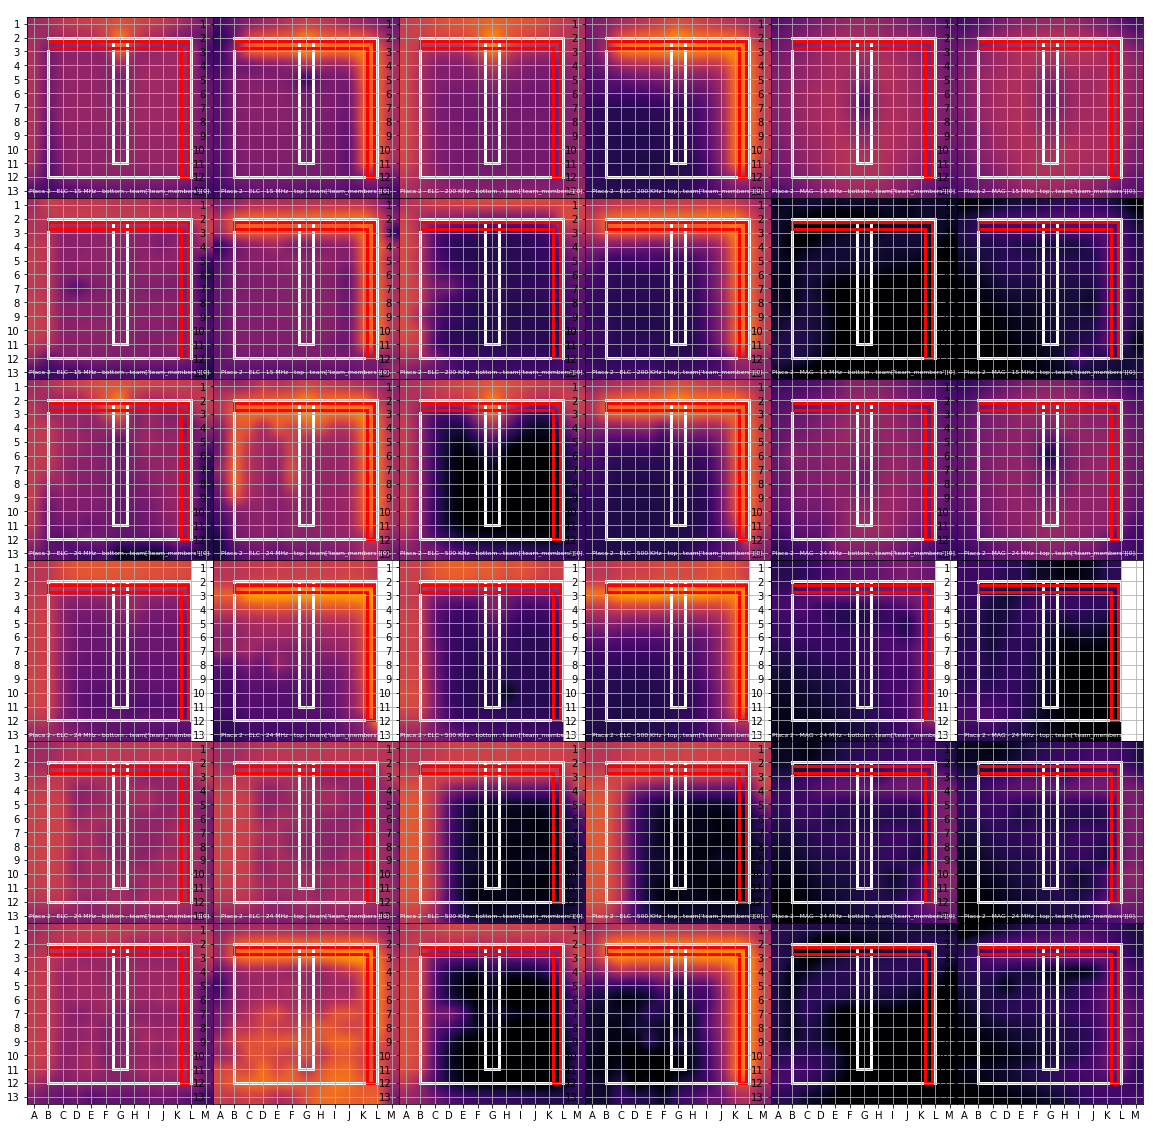

In [255]:
teams = []
#---------------------------------------------------------------------------------------------------------------------------------------
# Lucas e João:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Lucas', 'João'],
    board_number=2,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Botelho:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_Alta_Impedancia_Plano.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_Alta_Impedancia_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%20200k_Alta_Impedancia_Plano.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%20200k_Alta_Impedancia_Trilha.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_H_Field_Plano.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/botelho/5%20-%2015M_H_Field_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Botelho', ' '],
    board_number=2,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Federico e Gustavo:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_Alta_Impedancia_Referencia.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_Alta_Impedancia_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/200k_Alta_Impedancia_Referencia.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/200k_Alta_Impedancia_Trilha.csv',
    signal_frequency='200 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_H_Field_Referencia.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/federico_gustavo/15M_H_Field_Trilha.csv',
    signal_frequency='15 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Botelho'],
    board_number=2,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Ian e Cleisson:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_baixo_Z.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_cima_Z.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%20500k_baixo_Z.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%20500k_cima_Z.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_cima_H.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/ian_cleissom/1%20-%2024M_baixo_H.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Iam', 'Cleisson'],
    board_number=2,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Luiz e Matheus:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_500k.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_plan_cima_500k.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_variando_trilha_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/luiz_matheus/medicao_placa_L_Med_variando_trilha_cima_24m.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Iam', 'Cleisson'],
    board_number=2,
    planes=planes
))

#---------------------------------------------------------------------------------------------------------------------------------------
# Wellington e Gabriel:
planes = []
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_ref_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_trilha_L_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_ref_500kHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_eletrico_trilha_L_500kHz.csv',
    signal_frequency='500 KHz',
    probe_type='ELC',
    pcb_side='top'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_mag_ref_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='bottom'
))
planes.append(plane(
    url_of_csv_file='https://raw.githubusercontent.com/lsmanoel/CEM_4/master/CEM_4_2019_1/wellington_gabriel/PLACA_03_campo_mag_trilha_L_24MHz.csv',
    signal_frequency='24 MHz',
    probe_type='MAG',
    pcb_side='top'
))

teams.append(team(
    team_members=['Wellington', 'Gabriel'],
    board_number=2,
    planes=planes
))

plot(teams)

In [105]:
a = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
print(a)

ncol = len(a[0])
nrow = len(a)

for row in range(nrow):
    for col in range(ncol):
#         index = 1 +col +row*ncol
        index = 1 +row +nrow*col
        a[row][col] = index 
        
print(np.matrix(a))
print(np.matrix(a).shape)
print(ncol)
print(nrow)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[[ 1  7]
 [ 2  8]
 [ 3  9]
 [ 4 10]
 [ 5 11]
 [ 6 12]]
(6, 2)
2
6
